In [1]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.optim import SGD
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np

/Users/muhammadwaseem/miniconda3/envs/torch/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/muhammadwaseem/miniconda3/envs/torch/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <CAE66874-17C2-35C9-9C4D-6BA9770AF17F> /Users/muhammadwaseem/miniconda3/envs/torch/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <459875AA-DE2C-366B-9C44-90D4B3887080> /Users/muhammadwaseem/miniconda3/envs/torch/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


## Data loading

In [2]:
path = './'

mnist_train_data = MNIST(root = path,
                         train = True,
                         transform = ToTensor(),
                         download = True)
mnist_test_data = MNIST(root = path,
                        train = False,
                        transform = ToTensor(),
                        download = True)

In [3]:
mnist_train_data, mnist_test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
batch_size = 64
data = DataLoader(mnist_train_data, batch_size=batch_size, shuffle=True)

## Model

In [5]:
Model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [6]:
# class Net(nn.Module):
#     def __init__(self, in_features, out_features):
#         super().__init__()
#         f1 = nn.Flatten()
#         l1 = nn.Linear(in_features, 32)
#         a1 = nn.ReLU()
#         l2 = nn.Linear(32, 16)
#         a2 = nn.ReLU()
#         l3 = nn.Linear(16, out_features)
#         L = [f1,l1,a1,l2,a2,l3]
#         self.layers = nn.ModuleList(L)
#     def forward(self, x):
#         for layer in self.layers:
#             x = layer(x)
#         return x
# Model = Net(786, 10)

In [8]:
torch.manual_seed(1)
Model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

In [10]:
loss_func = nn.CrossEntropyLoss()
optimizer = SGD(Model.parameters(), lr=0.003)

In [11]:
def train(model, epoch, data):
    Training_loss = [0] * epoch
    Training_accuracy = [0] * epoch
#     Test_loss = [0] * epoch
#     Test_accuracy = [0] * epoch

    for i in range(epoch):
        
        ## Training Phase
        for x_batch, y_batch in data:
            # Predictions after forward pass
            pred = Model(x_batch)
            
            # Calculating loss
            loss = loss_func(pred, y_batch)
            
            # Calculating gradients
            loss.backward()
            
            # Updating gradients and resetting to zero(to avoid accumulating)
            optimizer.step()
            optimizer.zero_grad()
            
            # Calculating **Sum of** Train loss and accuracy for each BATCH
            Training_loss[i] += loss.item() * x_batch.size(0)
            softmax = torch.softmax(pred, axis=1)
            correct_cnt = (torch.argmax(softmax, axis=1) == y_batch).sum()
            Training_accuracy[i] += correct_cnt.item()
            
        # Calculate **Average** train loss and accuracy for each EPOCH
        Training_loss[i] /= len(data.dataset)
        Training_accuracy[i] /= len(data.dataset)
        
        print(f"Epoch: {i+1}, Loss: {Training_loss[i]}, Accuracy: {Training_accuracy[i]}")
    return Training_loss, Training_accuracy#, Test_loss, Test_accuracy

In [12]:
epoch = 20
Training_loss, Training_accuracy = train(Model, epoch, data)

Epoch: 1, Loss: 2.272375662612915, Accuracy: 0.20546666666666666
Epoch: 2, Loss: 2.082053226153056, Accuracy: 0.39798333333333336
Epoch: 3, Loss: 1.6355042161941529, Accuracy: 0.5757166666666667
Epoch: 4, Loss: 1.092938087717692, Accuracy: 0.7334666666666667
Epoch: 5, Loss: 0.7545281814575195, Accuracy: 0.80035
Epoch: 6, Loss: 0.6022098314285278, Accuracy: 0.83455
Epoch: 7, Loss: 0.5215864067077637, Accuracy: 0.85595
Epoch: 8, Loss: 0.4720823108990987, Accuracy: 0.8685666666666667
Epoch: 9, Loss: 0.4390997749169668, Accuracy: 0.8765666666666667
Epoch: 10, Loss: 0.41568865728378296, Accuracy: 0.8824333333333333
Epoch: 11, Loss: 0.3978498578548431, Accuracy: 0.8869666666666667
Epoch: 12, Loss: 0.3835001739025116, Accuracy: 0.8913666666666666
Epoch: 13, Loss: 0.3713238467534383, Accuracy: 0.8949
Epoch: 14, Loss: 0.3609425377527873, Accuracy: 0.8977833333333334
Epoch: 15, Loss: 0.35157105704943337, Accuracy: 0.90065
Epoch: 16, Loss: 0.34320742403666177, Accuracy: 0.9037166666666666
Epoch: 

Possible Error : RuntimeError: result type Float can't be cast to the desired output type Long <br>
Rectified by : correct_cnt.item() in line 15 of above cell

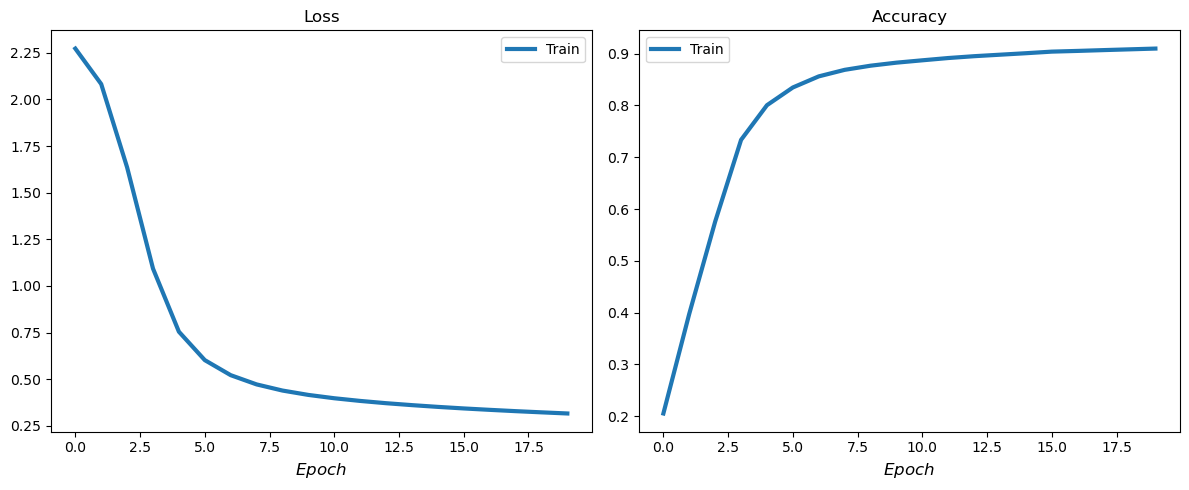

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(epoch), Training_loss, lw=3)
# plt.plot(np.arange(epoch), Test_loss, lw=3)
plt.xlabel("$Epoch$", size=12)
plt.title("Loss")
plt.legend(["Train"])

plt.subplot(1,2,2)
plt.plot(np.arange(epoch), Training_accuracy, lw=3)
# plt.plot(np.arange(epoch), Test_accuracy, lw=3)
plt.xlabel("$Epoch$", size=12)
plt.title("Accuracy")
plt.legend(["Train"])
plt.tight_layout()

## Test data accuracy

In [14]:
prediction = Model(mnist_test_data.data.to(torch.float32))
prediction.shape

torch.Size([10000, 10])

In [15]:
mnist_test_data.targets.to(torch.float32).shape

torch.Size([10000])

In [16]:
correct_cnt = (
    torch.argmax(prediction, dim=1) == mnist_test_data.targets.to(torch.float32)
    ).sum()

print(f"Test data accuracy: {correct_cnt/len(mnist_test_data.targets) * 100:.2f}%")

Test data accuracy: 90.64%
